The goal of this TP is to create random number denerators, and evaluate their radomness quality.

In [76]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

#import algorithmK.py as alK

The first one we will implement is the K-algorithm seen in the TP session

In [77]:
### k algorithm

def k1(X):
    Y = int(X / (10 ** 9))
    return int(Y + 1)

def k2(X):
    Z = math.floor(X / (10 ** 8)) % 10
    return int(3 + Z)

def k3(X):
    if X < 5 * 10**9:
        X = X + 5 * 10**9
    return int(X)

def k4(X):
    X = int((X ** 2) / (10 ** 5)) % (10 ** 10)
    return int(X)

def k5(X):
    X = (1001001001 * X) % (10 ** 10)
    return int(X)

def k6(X):
    if X < 100000000:
        X = X + 9814055677
    else:
        X = (10 ** 10) - X
    return int(X)

def k7(X):
    X = (10**5)*(X % (10**5))+ int(X/(10**5))
    return int(X)

def k8(X):
    return k5(X)

def k9(X):
    X = list(str(X))
    for i in range(len(X)):
        if X[i] != "0":
            v = str(int(X[i])-1)
            X[i] = v
    return int(''.join(X))

def k10(X):
    if X < (10**5):
        X = X**2 + 99999
    else:
        X = X - 99999
    return int(X)

def k11(X):
    for i in range(2):
        if X < 10**9:
            X = 10 * X
    return int(X)

def k12(X):
    X = int(X*X-1/(10**5)) % (10**10)
    return int(X)

def main(X):
    Y = k1(X)
    for i in range(Y):
        j = 2
        while j < 13:
            if j == 2:
                Z = k2(X)
                j = Z + 3
            elif j == 3:
                X = k3(X)
                j = j + 1
            elif j == 4:
                X = k4(X)
                j = j + 1
            elif j == 5:
                X = k5(X)
                j = j + 1
            elif j == 6:
                X = k6(X)
                j = j + 1
            elif j == 7:
                X = k7(X)
                j = j + 1
            elif j == 8:
                X = k8(X)
                j = j + 1
            elif j == 9:
                X = k9(X)
                j = j + 1
            elif j == 10:
                X = k10(X)
                j = j + 1
            elif j == 11:
                X = k11(X)
                j = j + 1
            elif j == 12:
                X = k12(X)
                j = 13
    return X

The second one is any linear congruential generator

A linear congruential generator is a iterative function of type: $X_i =(a×X_{i−1}+c)\ mod\ m$

$X_0$ is called the seed value

In this case the variables will be set to the follwing values:
$\newline$
a = 1664525,
m = $2^{32}$,
c = 1013904223


In [78]:
### linear congruentil generator

def LCG(x, a, c, m):
    x = x % m
    vals = []
    for i in range(1000):
        x = (a*x + c) % m
        vals.append(x)
    return vals[-1]


The third and final one is an algorithm made by me

In [93]:
### algorithm made by me

def it_algo(X):
    return X % 90
    
def algo(X):
    it = it_algo(X)
    i = 0
    m = 10**10
    while i < it:
        X = int(X*X-1/(10**5)) % (10**10)
        X = abs(X**2 - X**3)
        X = abs(X - i)
        X = X % m
        i = i + 1
    return X
    

In [94]:
### compute 100 random numbers using random library from py to use as seed values

seeds = []

with open("random250.txt") as f:
    lines = f.readlines()
    for i in range(len(lines)):
        seeds.append(int(lines[i][:-1]))



In [95]:
### use seed values to compute 1000 random vaues using all three algorithms

randomValues1 = []
randomValues2 = []
randomValues3 = []
for i in range(len(seeds)):
    randomValues1.append(main(seeds[i]))
    randomValues2.append(LCG(seeds[i], 1664525, 1013904223, 2**32))
    randomValues3.append(algo(seeds[i]))



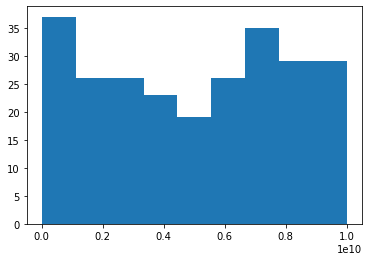

In [109]:
plt.hist(randomValues1, bins='auto')
plt.show()

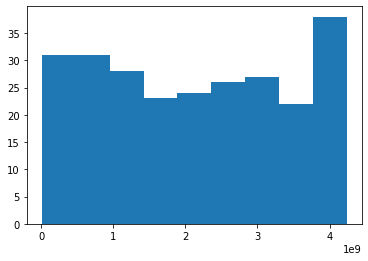

In [105]:
plt.hist(randomValues2, bins='auto')
plt.show()

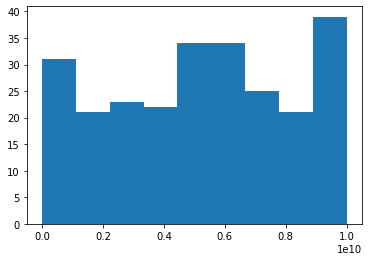

In [106]:
plt.hist(randomValues3, bins='auto')
plt.show()